In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('take_home_file.csv')

data.head()

,reservation_id,created,driver_id,owner_id,vehicle_id,driver_age,market_area,delivery_type,make,model,...,guest_insurance_fee,delivery_fee,other_fee,total_fees,gross_revenue,owner_earnings,net_revenue,turo_take_home_rate,countcolumn,age_bucket
0,1603541,1/1/2017,167324,850751,158769,62.0,Market A,Airport Delivery,Nissan,Sentra,...,0.00,0.0,15.45,26.25,134.25,96.00,38.25,28.49%,1,65+
1,1537732,1/1/2017,216764,1906594,217449,39.0,Market A,Airport Delivery,Dodge,Grand Caravan,...,100.89,0.0,9.27,177.42,850.02,513.45,336.57,39.60%,1,36-40
2,1603829,1/1/2017,581695,850751,211771,45.0,Market A,Airport Delivery,Chevrolet,Equinox,...,0.00,0.0,0.00,7.70,84.70,57.75,26.95,31.82%,1,41-45
3,1566375,1/1/2017,585788,1155720,190819,28.0,Market B,Airport Delivery,Mercedes-Benz,C-Class,...,20.25,20.0,0.00,53.75,188.75,116.25,72.50,38.41%,1,26-35
4,1606634,1/1/2017,781705,1387396,175907,23.0,Market A,No Delivery,Chrysler,PT Cruiser,...,3.60,0.0,0.00,10.80,34.80,18.00,16.80,48.28%,1,18-25


In [7]:
corr = data['total_fees'].corr(data['net_revenue'])

print(f'Correlation between Total Fees and Net Revenue: {corr}')

Correlation between Total Fees and Net Revenue: 0.676655046732522


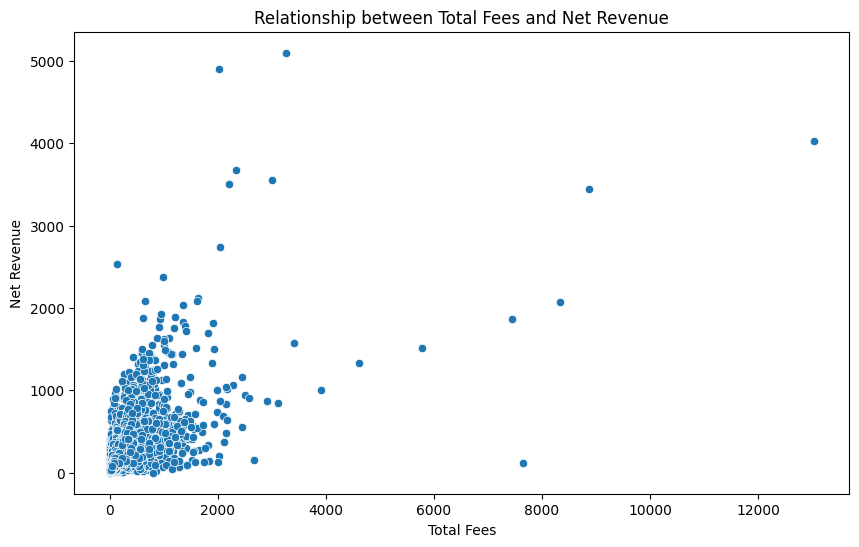

In [5]:
#creating scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_fees', y='net_revenue', data=data)
plt.title('Relationship between Total Fees and Net Revenue')
plt.xlabel('Total Fees')
plt.ylabel('Net Revenue')
plt.show()

In [8]:
#Building Linear Regression
x = data['total_fees'].values.reshape(-1,1)
y = data['net_revenue'].values

model = LinearRegression()

model.fit(x,y)

print(f'Slope: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

Slope: 0.5407612937181356
Intercept: 58.51697119767536


In [10]:
#Grouping on Markets
group = data.groupby('market_area')[['net_revenue','total_fees']].mean().reset_index()
print(group)

  market_area  net_revenue  total_fees
0    Market A   103.432741   79.160291
1    Market B    98.807923   77.731946


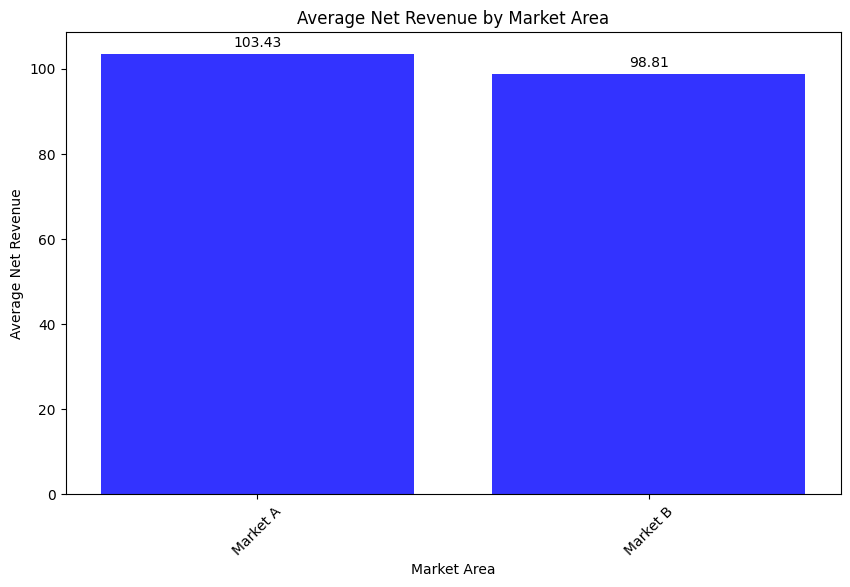

In [17]:
#Build Viz

plt.figure(figsize=(10, 6))
bar_plot = plt.bar(group['market_area'], group['net_revenue'], color='blue', alpha=0.8)
plt.xlabel('Market Area')
plt.ylabel('Average Net Revenue')
plt.title('Average Net Revenue by Market Area')
plt.xticks(rotation=45)

for bar in bar_plot:
    height = bar.get_height()
    plt.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

plt.show()